In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.model_selection import train_test_split
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


In [2]:
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [3]:
path='./archive (1)/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ./archive (1)/waldstein_1.mid
Loading Music File: ./archive (1)/beethoven_opus90_2.mid
Loading Music File: ./archive (1)/waldstein_2.mid
Loading Music File: ./archive (1)/islamei.mid
Loading Music File: ./archive (1)/beethoven_opus90_1.mid
Loading Music File: ./archive (1)/waldstein_3.mid
Loading Music File: ./archive (1)/bach_847.mid
Loading Music File: ./archive (1)/bach_846.mid
Loading Music File: ./archive (1)/bach_850.mid
Loading Music File: ./archive (1)/alb_se8.mid
Loading Music File: ./archive (1)/beethoven_opus10_2.mid
Loading Music File: ./archive (1)/beethoven_opus10_3.mid
Loading Music File: ./archive (1)/elise.mid
Loading Music File: ./archive (1)/beethoven_opus10_1.mid
Loading Music File: ./archive (1)/appass_2.mid
Loading Music File: ./archive (1)/appass_3.mid
Loading Music File: ./archive (1)/appass_1.mid
Loading Music File: ./archive (1)/beethoven_les_adieux_3.mid
Loading Music File: ./archive (1)/pathetique_1.mid
Loading Music File: ./archive (1)/m

In [4]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

399


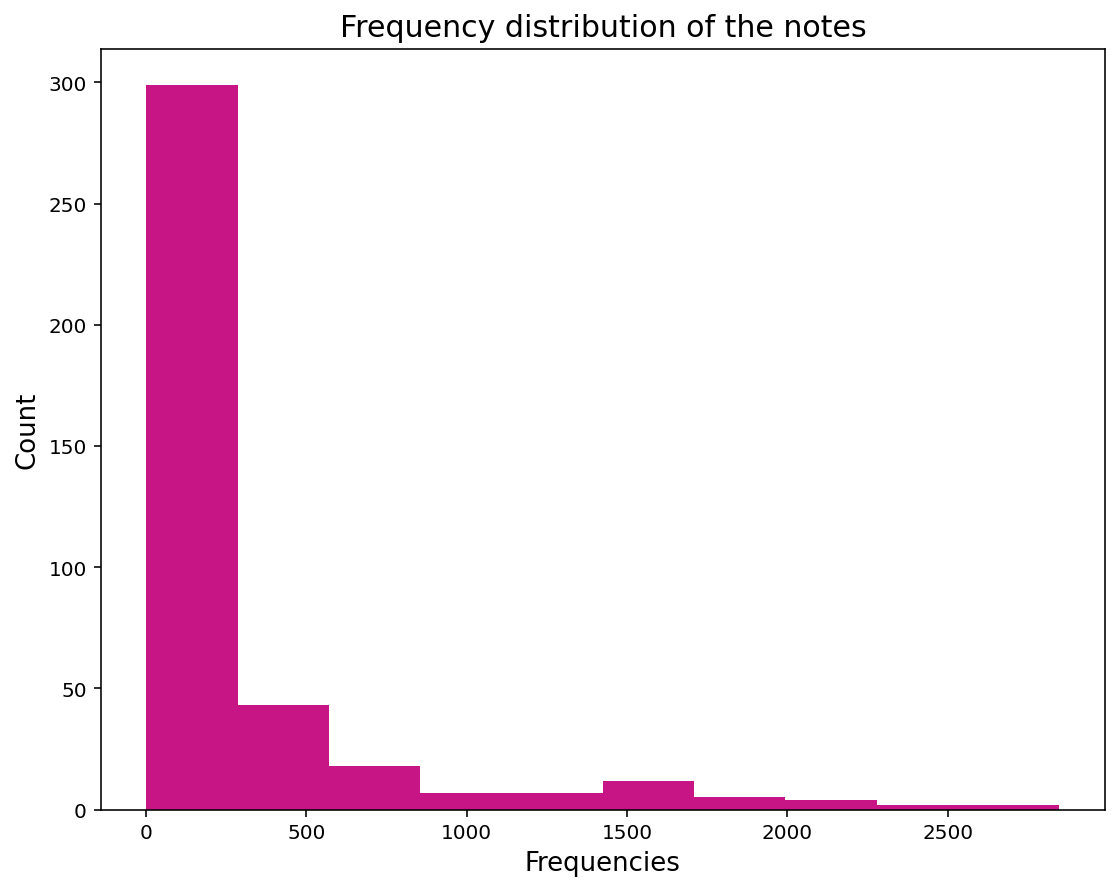

In [9]:
#computing frequency of each note
freq = dict(Counter(notes_))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(9,7))

#plot
plt.title("Frequency distribution of the notes", fontsize=15)
plt.ylabel('Count', fontsize= 13)
plt.xlabel('Frequencies', fontsize= 13)
plt.hist(no, color = 'mediumvioletred');

In [10]:
frequent_notes = [note_ for note_, count in freq.items() if count>=35]
print(len(frequent_notes))

182


In [11]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [12]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [13]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [14]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [15]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [16]:
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
def lstm():
    model = Sequential()
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model